In [92]:
import pandas as pd
df = pd.read_csv('../data/telcom_churn.csv.xls')
print(df.shape)
print(df.info())
print(df.head())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [93]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [94]:
missing_summary = df.isnull().sum()
print("Missing values per column:\n", missing_summary)

Missing values per column:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [95]:
df_cleaned = df.dropna()

In [96]:
print("Shape before cleaning:",df.shape)
print("Shape after cleaning:",df_cleaned.shape)

Shape before cleaning: (7043, 21)
Shape after cleaning: (7032, 21)


In [97]:
df_cleaned. to_csv('../data/telcom_churn_cleaned.csv', index=False)
print("Cleaned data saved to '../data/telcom_churn_cleaned.csv'")

Cleaned data saved to '../data/telcom_churn_cleaned.csv'


<Axes: title={'center': 'Churn Distribution'}, xlabel='Churn'>

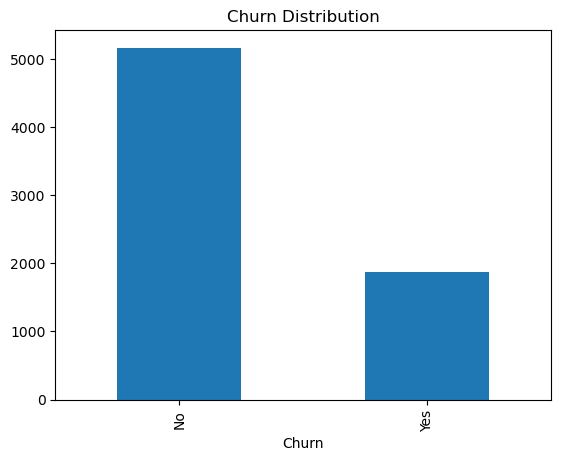

In [98]:
df_cleaned['Churn'].value_counts().plot(kind='bar', title='Churn Distribution')

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

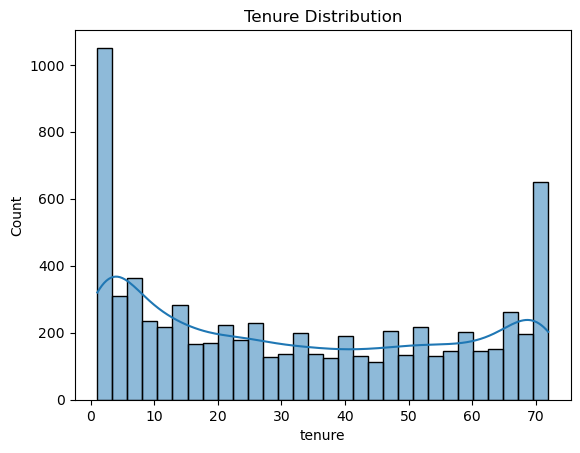

In [100]:
sns.histplot(df_cleaned['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()

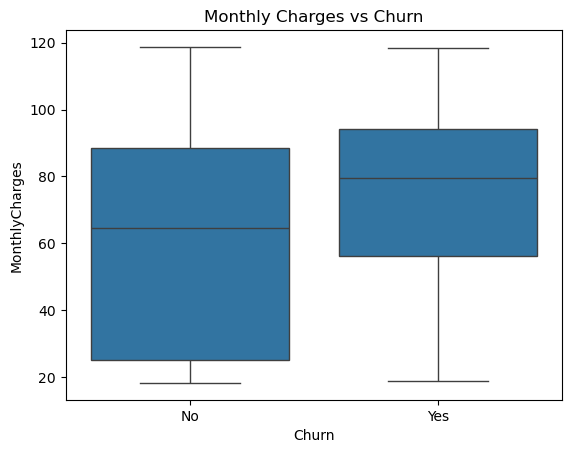

In [101]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df_cleaned)
plt.title('Monthly Charges vs Churn')
plt.show()

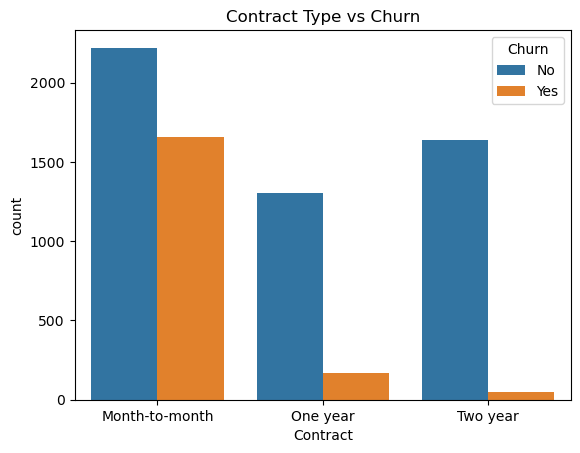

In [102]:
sns.countplot(x='Contract', hue='Churn',data=df_cleaned)
plt.title('Contract Type vs Churn')
plt.show()

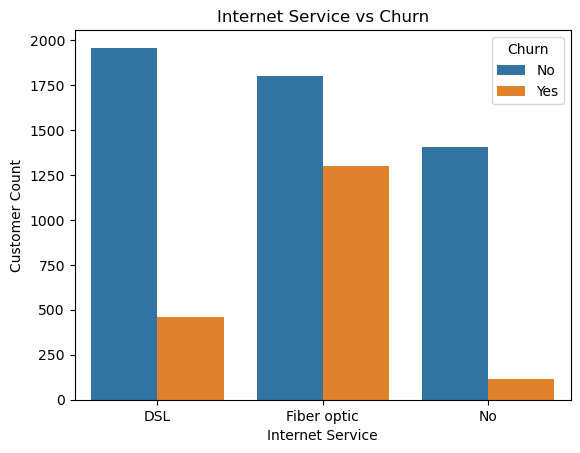

In [103]:
sns.countplot(x='InternetService', hue='Churn', data=df_cleaned)
plt.title('Internet Service vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Customer Count')
plt.show()

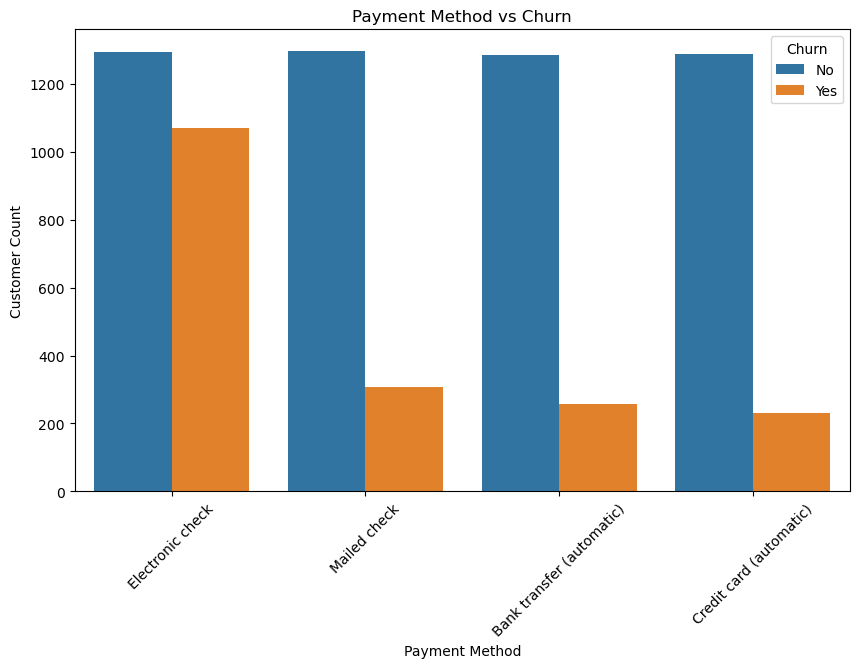

In [104]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df_cleaned)
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()

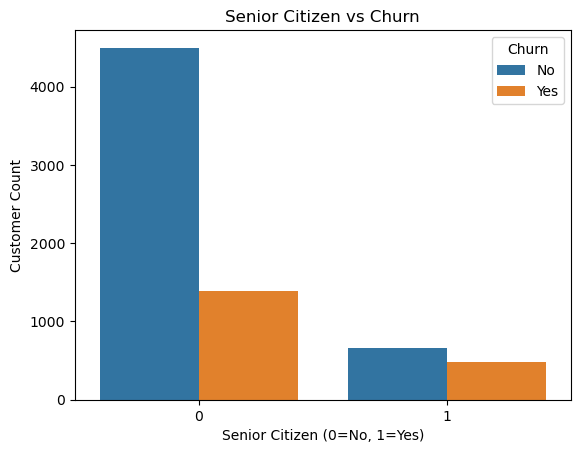

In [105]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df_cleaned)
plt.title('Senior Citizen vs Churn')
plt.xlabel('Senior Citizen (0=No, 1=Yes)')
plt.ylabel('Customer Count')
plt.show()

In [106]:
df_encoded = pd.get_dummies(df_cleaned.drop('customerID', axis=1), drop_first=True)


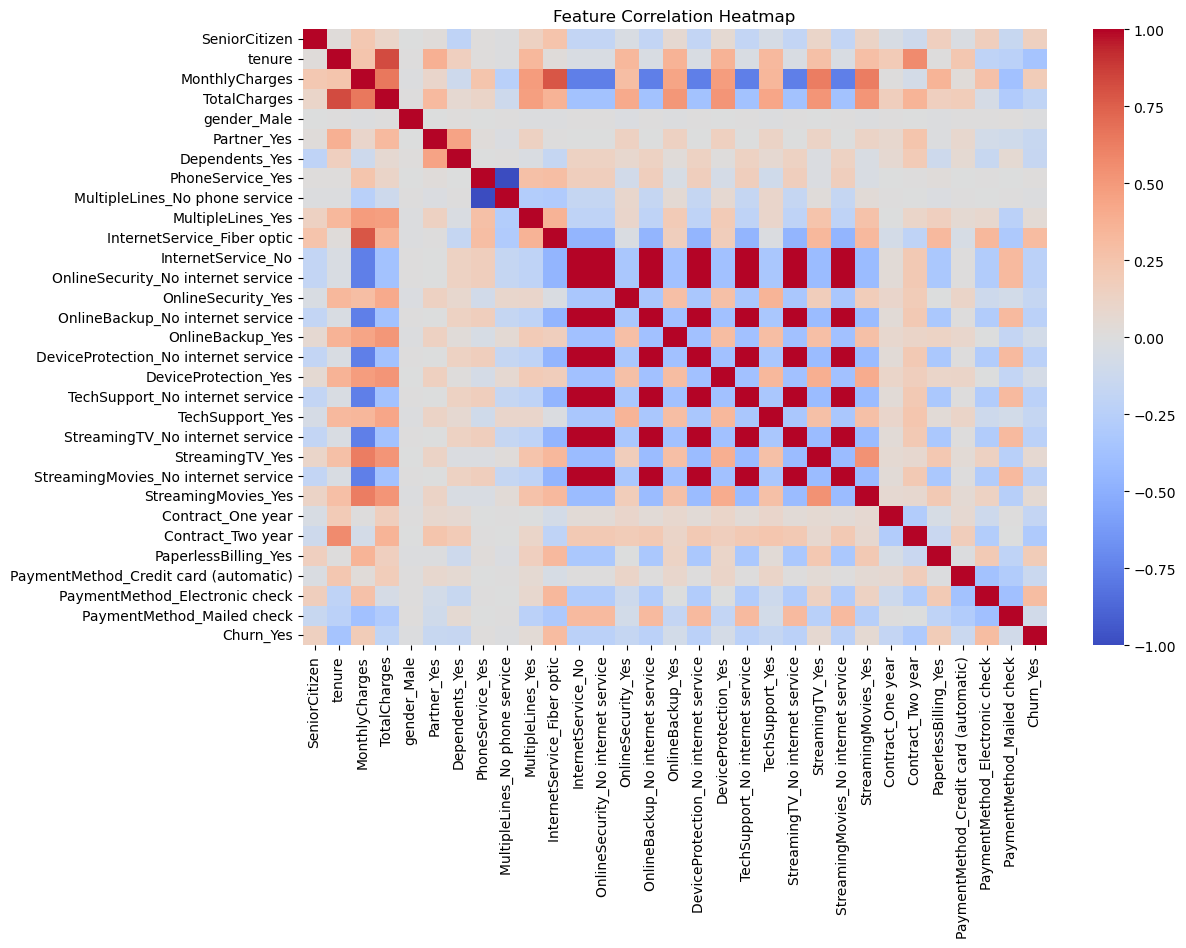

In [107]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

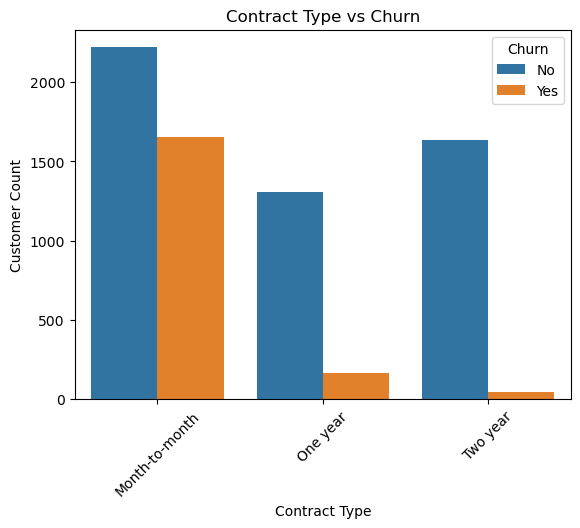

In [108]:
sns.countplot(x='Contract', hue='Churn', data=df_cleaned)
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()

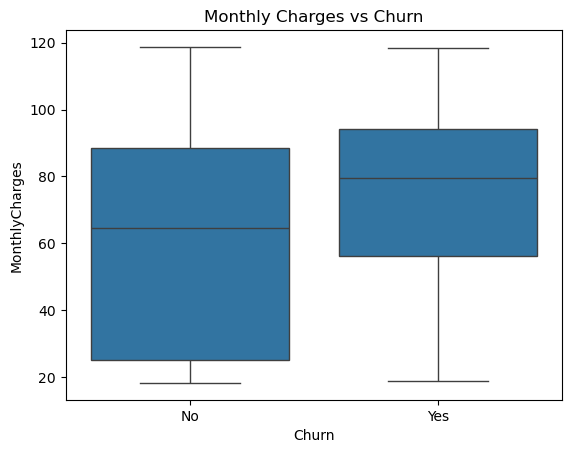

In [109]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_cleaned)
plt.title('Monthly Charges vs Churn')
plt.show()

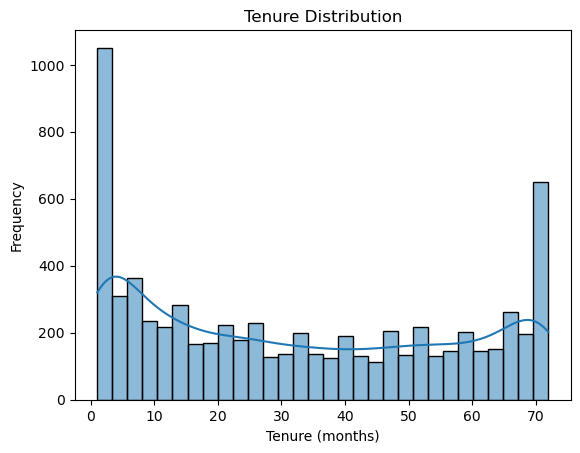

In [110]:
sns.histplot(df_cleaned['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.ylabel('Frequency')
plt.show()

In [111]:
df_model = pd.get_dummies(df_cleaned.drop(['customerID'], axis=1), drop_first=True)

In [112]:
x = df_model.drop('Churn_Yes', axis=1)
y = df_model['Churn_Yes']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[916 117]
 [159 215]]
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



c:\Users\manoj\anaconda3\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[917 116]
 [180 194]]
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [117]:
import matplotlib.pyplot as plt
import numpy as np

In [119]:
df_model = pd.get_dummies(df_cleaned.drop('customerID', axis=1), drop_first=True)
x = df_model.drop('Churn_Yes', axis=1)
y = df_model['Churn_Yes']

In [121]:
features = x.columns
importances = rf_model.feature_importances_

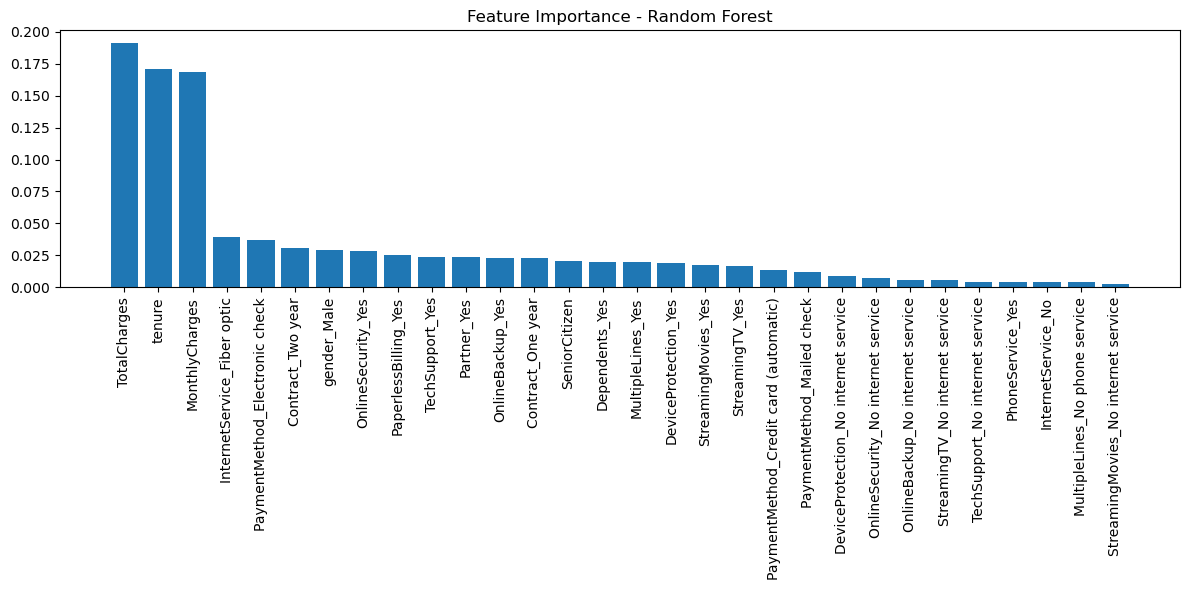

In [122]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
feature_importance = pd.Series(rf_model.feature_importances_, index=x.columns)
sorted_importance = feature_importance.sort_values(ascending=False)

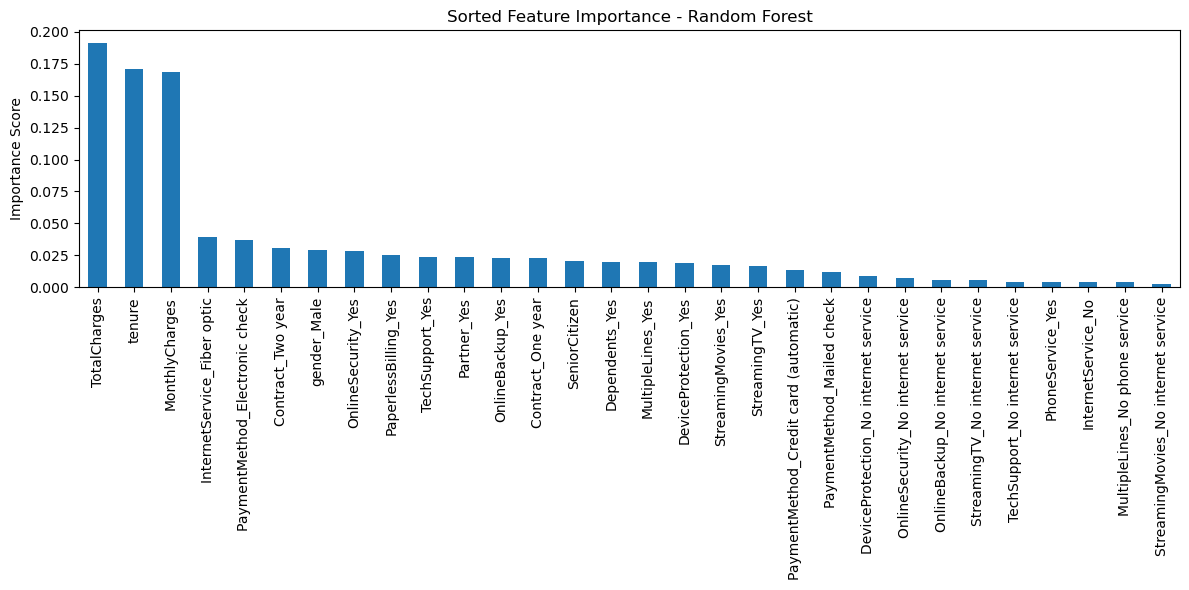

In [130]:
plt.figure(figsize=(12,6))
sorted_importance.plot(kind='bar')
plt.title('Sorted Feature Importance - Random Forest')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()